In [6]:
import os
os.getcwd()
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/margueritevergne/Downloads')


In [5]:
df=pd.read_csv('./ks-projects-201801.csv')

In [9]:
pd.options.display.float_format='{:4f}'.format

In [10]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000000,2015-08-11 12:12:28,0.000000,failed,0,GB,0.000000,0.000000,1533.950000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000000,2017-09-02 04:43:57,2421.000000,failed,15,US,100.000000,2421.000000,30000.000000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000000,2013-01-12 00:20:50,220.000000,failed,3,US,220.000000,220.000000,45000.000000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000000,2012-03-17 03:24:11,1.000000,failed,1,US,1.000000,1.000000,5000.000000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000000,2015-07-04 08:35:03,1283.000000,canceled,14,US,1283.000000,1283.000000,19500.000000


In [11]:
df.shape

(378661, 15)

In [13]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [15]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.000000,378661.000000,378661.000000,378661.000000,374864.000000,378661.000000,378661.000000
mean,1074731191.988755,49080.791521,9682.979339,105.617476,7036.728867,9058.924074,45454.401465
std,619086204.322627,1183391.259093,95636.010005,907.185035,78639.745308,90973.343107,1152950.055088
min,5971.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,538263516.000000,2000.000000,30.000000,2.000000,16.980000,31.000000,2000.000000
50%,1075275634.000000,5200.000000,620.000000,12.000000,394.720000,624.330000,5500.000000
75%,1610148624.000000,16000.000000,4076.000000,56.000000,3034.090000,4050.000000,15500.000000
max,2147476221.000000,100000000.000000,20338986.270000,219382.000000,20338986.270000,20338986.270000,166361390.710000


In [20]:
df.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [21]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [22]:
df.state.value_counts(normalize=True)

failed       0.522153
successful   0.353762
canceled     0.102411
undefined    0.009407
live         0.007392
suspended    0.004875
Name: state, dtype: float64

In [23]:
df_classify=df[df.state.isin(['failed','successful'])]
df_classify.state.value_counts(normalize=True)

failed       0.596123
successful   0.403877
Name: state, dtype: float64

In [25]:
df_classify.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000000,2015-08-11 12:12:28,0.000000,failed,0,GB,0.000000,0.000000,1533.950000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000000,2017-09-02 04:43:57,2421.000000,failed,15,US,100.000000,2421.000000,30000.000000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000000,2013-01-12 00:20:50,220.000000,failed,3,US,220.000000,220.000000,45000.000000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000000,2012-03-17 03:24:11,1.000000,failed,1,US,1.000000,1.000000,5000.000000
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.000000,2016-02-26 13:38:27,52375.000000,successful,224,US,52375.000000,52375.000000,50000.000000


In [26]:
df_classify.main_category.value_counts()

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

In [27]:
pd.crosstab(df_classify.main_category,df_classify.state)

state,failed,successful
main_category,,
Art,14131,11510
Comics,4036,5842
Crafts,5703,2115
Dance,1235,2338
Design,14814,10550
Fashion,14182,5593
Film & Video,32904,23623
Food,15969,6085
Games,16003,12518


In [30]:
table=pd.crosstab(df_classify.main_category,df_classify.state)
table['success_rate']=table.successful/(table.successful + table.failed)
table

state,failed,successful,success_rate
main_category,,,
Art,14131,11510,0.448890
Comics,4036,5842,0.591415
Crafts,5703,2115,0.270530
Dance,1235,2338,0.654352
Design,14814,10550,0.415944
Fashion,14182,5593,0.282832
Film & Video,32904,23623,0.417906
Food,15969,6085,0.275914
Games,16003,12518,0.438905


In [32]:
df_classify.currency.value_counts()

USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

In [33]:
table=pd.crosstab(df_classify.currency,df_classify.state)
table['success_rate']=table.successful/(table.successful + table.failed)
table

state,failed,successful,success_rate
currency,,,
AUD,4610,2011,0.303731
CAD,8238,4137,0.334303
CHF,465,187,0.286810
DKK,567,362,0.389666
EUR,10496,3882,0.269996
GBP,17395,12081,0.409859
HKD,261,216,0.452830
JPY,16,7,0.304348
MXN,1015,396,0.280652


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

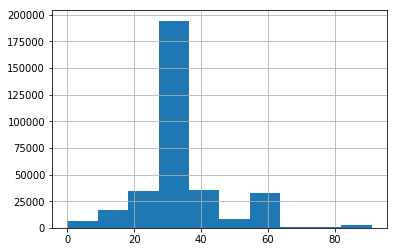

In [35]:
df_classify['launched_date'] = pd.to_datetime(df_classify.launched)
df_classify['deadline_date']= pd.to_datetime(df_classify.deadline)
df_classify['duration']=(df_classify.deadline_date - df_classify.launched_date).dt.days
df_classify.duration.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x108aa6908>,
      dtype=object)

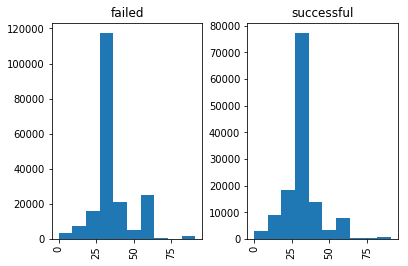

In [36]:
df_classify.duration.hist(by=df_classify.state)

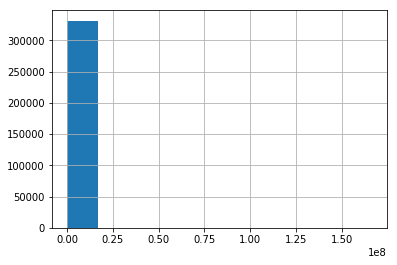

In [37]:
df_classify.usd_goal_real.hist()

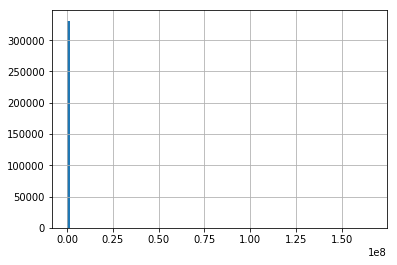

In [38]:
df_classify.usd_goal_real.hist(bins=100)

In [39]:
max(df_classify.usd_goal_real)

166361390.71

In [40]:
df_classify[df_classify.usd_goal_real>1000000]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,duration
340,1001542282,You in a novel,Publishing,Publishing,EUR,2015-11-09,1000000.000000,2015-09-10 23:03:21,10.000000,failed,1,IT,11.180000,10.760000,1076403.090000,2015-09-10 23:03:21,2015-11-09,59
971,1004941506,Maori MBT Awareness Centre,Web,Journalism,CAD,2017-10-18,2000000.000000,2017-08-19 22:13:55,2242.000000,failed,19,CA,1160.670000,1794.460000,1600768.370000,2017-08-19 22:13:55,2017-10-18,59
1042,1005237669,The Old Soul of a Lion,Film & Video,Film & Video,USD,2014-10-14,3000000.000000,2014-08-15 20:16:22,4.000000,failed,2,US,4.000000,4.000000,3000000.000000,2014-08-15 20:16:22,2014-10-14,59
1144,1005820080,The Million Pound Shirt,Fashion,Fashion,GBP,2015-11-25,1000000.000000,2015-10-21 22:00:04,10.000000,failed,1,GB,15.470000,15.050000,1505185.360000,2015-10-21 22:00:04,2015-11-25,34
1795,1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.000000,2014-06-21 22:34:21,285.000000,failed,5,CA,263.410000,264.670000,3575408.620000,2014-06-21 22:34:21,2014-07-21,29
2920,1015071175,Thermal Safe,Product Design,Design,USD,2015-06-10,2000000.000000,2015-04-22 03:54:47,665.000000,failed,8,US,665.000000,665.000000,2000000.000000,2015-04-22 03:54:47,2015-06-10,48
2993,1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.000000,2015-07-07 21:14:52,0.000000,failed,0,IT,0.000000,0.000000,5568982.990000,2015-07-07 21:14:52,2015-09-01,55
3140,1016210580,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.000000,2016-02-27 13:08:01,15.000000,failed,6,ES,16.590000,17.100000,17104542.970000,2016-02-27 13:08:01,2016-04-27,59
3271,1016899157,Musée du cirque Gilles MAIGNANT : NICE CIRCUS ...,Performance Art,Art,EUR,2015-10-25,1000000.000000,2015-08-26 19:38:53,100.000000,failed,1,FR,115.340000,110.170000,1101697.720000,2015-08-26 19:38:53,2015-10-25,59
3293,1017011422,Electric Car,Technology,Technology,MXN,2017-09-13,40000000.000000,2017-08-19 01:19:23,510.000000,failed,2,MX,0.000000,28.870000,2263980.080000,2017-08-19 01:19:23,2017-09-13,24


In [41]:
df_classify[df_classify.usd_goal_real>1000000].state.value_counts()

failed        829
successful     11
Name: state, dtype: int64

In [42]:
df_classify.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration
ID,1.000000,0.001900,0.000852,0.000838,-0.000289,0.000287,0.001844,0.002816
goal,0.001900,1.000000,0.007965,0.004794,0.006416,0.005955,0.952614,0.022692
pledged,0.000852,0.007965,1.000000,0.717316,0.857966,0.953571,0.005722,0.008115
backers,0.000838,0.004794,0.717316,1.000000,0.697493,0.752291,0.005208,-0.000050
usd pledged,-0.000289,0.006416,0.857966,0.697493,1.000000,0.907713,0.006965,0.007718
usd_pledged_real,0.000287,0.005955,0.953571,0.752291,0.907713,1.000000,0.006354,0.008651
usd_goal_real,0.001844,0.952614,0.005722,0.005208,0.006965,0.006354,1.000000,0.021607
duration,0.002816,0.022692,0.008115,-0.000050,0.007718,0.008651,0.021607,1.000000


In [43]:
df_classify.isnull().sum()

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
launched_date         0
deadline_date         0
duration              0
dtype: int64

In [88]:
Xs=df_classify[['usd_goal_real','backers','main_category','duration','currency']]
y=pd.get_dummies(data=df_classify.state, drop_first=True)

In [89]:
Xs=pd.get_dummies(data=Xs, columns=['main_category','currency'], drop_first=True)


# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_tr,X_t, y_tr, y_t=train_test_split(Xs,y,test_size=0.2)

In [55]:
from sklearn.linear_model import LogisticRegression

ks_model=LogisticRegression().fit(X_tr, y_tr)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
from sklearn.metrics import confusion_matrix

y_pred_test=ks_model.predict(X_t)
confusion_matrix(y_t,y_pred_test)

array([[37713,  1872],
       [ 4445, 22305]])

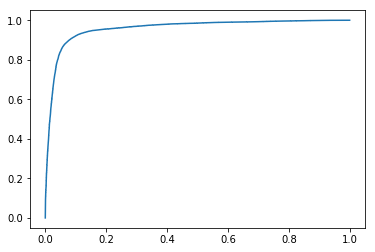

In [60]:
from sklearn import metrics

y_pred_proba=ks_model.predict_proba(X_t)[::,1]
fpr,tpr,_=metrics.roc_curve(y_t,y_pred_proba)

plt.plot(fpr,tpr)

In [62]:
auc=metrics.roc_auc_score(y_t,y_pred_proba)
auc

0.9578139538836927

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

ks_rf=RandomForestClassifier().fit(X_tr,y_tr)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
y_pred_test_rf=ks_rf.predict(X_t)
confusion_matrix(y_t,y_pred_test_rf)

array([[37019,  2566],
       [ 2732, 24018]])

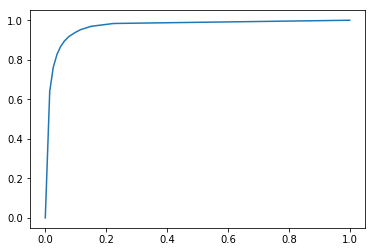

In [66]:
y_pred_proba=ks_rf.predict_proba(X_t)[::,1]
fpr,tpr,_=metrics.roc_curve(y_t,y_pred_proba)

plt.plot(fpr,tpr)

In [67]:
auc=metrics.roc_auc_score(y_t,y_pred_proba)
auc

0.9677036992441441

In [68]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

iris=datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [70]:
gnb=GaussianNB()
y_pred=gnb.fit(iris.data,iris.target).predict(iris.data)
confusion_matrix(iris.target,y_pred)                                        



array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [71]:
import pandas as pd

abalone_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abalone_cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_Weight', 
                'Shucked_Weight', 'Visecra_Weight', 'Shell_Weight', 'Rings']
abalone = pd.read_csv(abalone_url, names=abalone_cols)
abalone.head()

,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Visecra_Weight,Shell_Weight,Rings
0,M,0.455000,0.365000,0.095000,0.514000,0.224500,0.101000,0.150000,15
1,M,0.350000,0.265000,0.090000,0.225500,0.099500,0.048500,0.070000,7
2,F,0.530000,0.420000,0.135000,0.677000,0.256500,0.141500,0.210000,9
3,M,0.440000,0.365000,0.125000,0.516000,0.215500,0.114000,0.155000,10
4,I,0.330000,0.255000,0.080000,0.205000,0.089500,0.039500,0.055000,7


In [73]:
from sklearn.neighbors import KNeighborsClassifier
cols=[x for x in abalone.columns.values if x!='Sex']
neighbor_model=KNeighborsClassifier(n_neighbors=3)
neighbor_model.fit(abalone[cols],abalone.Sex)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [74]:
abalone.Sex.nunique()#number of unique

3

In [77]:
obs=np.array([[0.5,0.3,0.05,0.6,0.2,0.1,0.1,8]])
print(neighbor_model.predict(obs))

y_pred=neighbor_model.predict(abalone[cols])
confusion_matrix(abalone.Sex,y_pred)

#m: m,i,f
#i: m,i,f
#f: m,i,f

['I']


array([[ 969,   75,  263],
       [ 170, 1085,   87],
       [ 360,  127, 1041]])

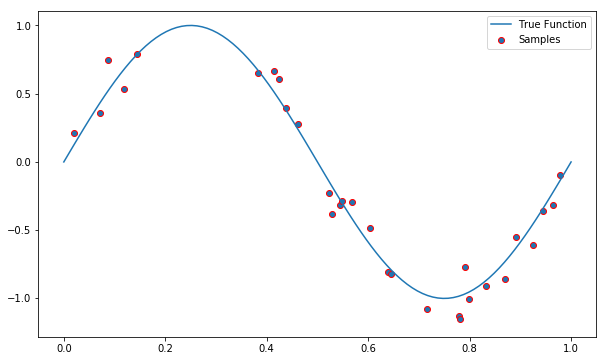

In [78]:
def true_fxn(x):
    """Sine wave function"""
    return np.sin(2 * np.pi * x)

np.random.seed(0)

# Generate random points centered around the true function with a bit of random noise added
num_samples = 30
noise_strength = 0.1
X = np.sort(np.random.rand(num_samples))
y = true_fxn(X) + np.random.randn(num_samples) * noise_strength

plt.figure(figsize=(10, 6))
X_range = np.linspace(0, 1, 100)
plt.plot(X_range, true_fxn(X_range), label="True Function")
plt.scatter(X, y, label="Samples", edgecolor='r')
plt.legend(loc="best")
plt.show()

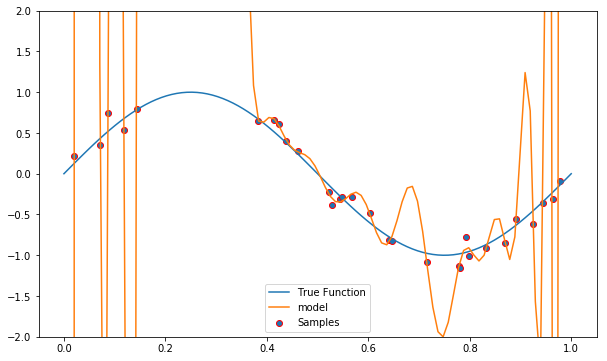

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=40), LinearRegression())
model.fit(X[:, np.newaxis], y)

plt.figure(figsize=(10, 6))
X_range = np.linspace(0, 1, 100)
plt.plot(X_range, true_fxn(X_range), label="True Function")
plt.plot(X_range, model.predict(X_range[:, np.newaxis]), label="model")
plt.scatter(X, y, label="Samples", edgecolor='r')
plt.legend(loc="best")
plt.ylim((-2, 2))
plt.show()

In [80]:
model.score(X[:, np.newaxis], y)

0.9956743693783364

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(30, 1), y, test_size=0.3)

In [82]:
model.fit(X_train, y_train)

print("Model performance on traing set: {}".format(model.score(X_train, y_train)))
print("Model performance on testing set: {}".format(model.score(X_test, y_test)))

Model performance on traing set: 0.9999999997606571
Model performance on testing set: -676.0097234772091


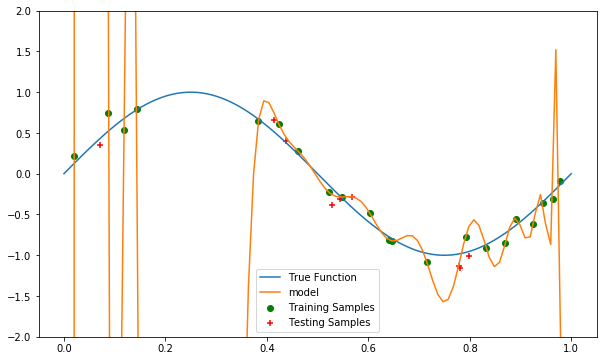

In [83]:
plt.figure(figsize=(10, 6))
X_range = np.linspace(0, 1, 100)
plt.plot(X_range, true_fxn(X_range), label="True Function")
plt.plot(X_range, model.predict(X_range[:, np.newaxis]), label="model")
plt.scatter(X_train, y_train, label="Training Samples", color='g')
plt.scatter(X_test, y_test, label="Testing Samples", color='r', marker="+")
plt.legend(loc="best")
plt.ylim((-2, 2))
plt.show()

In [85]:
from sklearn.metrics import r2_score

score = r2_score(actual_values, predictions)

NameError: name 'actual_values' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error

score = mean_squared_error(actual_values, predictions)

In [ ]:
from sklearn.metrics import mean_absolute_error

score = mean_absolute_error(actual_values, predictions)

In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(actual_values, predictions)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

score = balanced_accuracy_score(actual_values, predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(actual_values, predictions)
recall = recall_score(actual_values, predictions)
f1_score = f1_score(actual_values, predictions)